<a href="https://colab.research.google.com/github/Manav-Gupta/Solar-Irradiance-Bio-Inspired/blob/main/LSTM_Solar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mounting the drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import keras
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import Adam
from datetime import datetime


In [ ]:
dataset=pd.read_csv('drive/My Drive/Colab Notebooks/BA_Combined.csv')
dataset.head(10)

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed
0,2010,1,1,0,30,0,0,0,-5,11.852440,996.147217,29.790052,36.635731,2.722316
1,2010,1,1,1,30,0,0,0,-5,11.225597,996.248657,30.983252,38.746647,2.707211
2,2010,1,1,2,30,0,0,0,-5,10.658190,995.821533,32.399748,41.129784,2.798367
3,2010,1,1,3,30,0,0,0,-4,10.129504,995.645081,34.192746,44.009598,2.898466
4,2010,1,1,4,30,0,0,0,-4,9.635840,995.924561,36.213530,47.319065,2.890179
5,2010,1,1,5,30,0,0,0,-4,13.329075,996.727173,29.696787,49.007072,3.624711
6,2010,1,1,6,30,0,0,0,-3,12.871681,997.495850,31.083023,57.249115,3.618878
7,2010,1,1,7,30,0,0,0,-3,13.520990,998.175964,31.173157,64.765450,3.562192
8,2010,1,1,8,30,80,292,135,-2,16.388988,998.849304,27.988229,70.387955,3.084073
9,2010,1,1,9,30,118,577,331,0,19.753776,999.441589,25.638371,72.587616,2.419390


Using TensorFlow backend.


    Month  Day  Hour  ...    Pressure  Relative Humidity  Wind Speed
0       1    1     0  ...  996.147217          29.790052    2.722316
1       1    1     1  ...  996.248657          30.983252    2.707211
2       1    1     2  ...  995.821533          32.399748    2.798367
3       1    1     3  ...  995.645081          34.192746    2.898466
4       1    1     4  ...  995.924561          36.213530    2.890179
5       1    1     5  ...  996.727173          29.696787    3.624711
6       1    1     6  ...  997.495850          31.083023    3.618878
7       1    1     7  ...  998.175964          31.173157    3.562192
8       1    1     8  ...  998.849304          27.988229    3.084073
9       1    1     9  ...  999.441589          25.638371    2.419390
10      1    1    10  ...  999.189270          21.699108    2.170230
11      1    1    11  ...  998.304016          18.483890    1.936101
12      1    1    12  ...  997.064331          17.682752    1.393144
13      1    1    13  ...  996.438

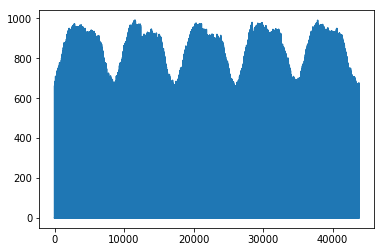

In [ ]:
#Removing unnecessary data
dataset=pd.read_csv('drive/My Drive/Colab Notebooks/BA_Combined.csv')
dataset.drop('Minute',axis=1,inplace=True)
dataset.drop('Year',axis=1,inplace=True)
dataset.drop('DHI',axis=1,inplace=True)
dataset.drop('DNI',axis=1,inplace=True)
dataset.drop('Wind Direction',axis=1,inplace=True)
dataset.columns=['Month','Day','Hour','GHI','Dew Point','Temperature','Pressure','Relative Humidity','Wind Speed']
dataset = dataset[['Month','Day','Hour','GHI','Dew Point','Temperature','Pressure','Relative Humidity','Wind Speed']]
print(dataset.head(20))

dataset.to_csv('final.csv')
plt.plot(dataset['GHI'])

In [ ]:
dataset=read_csv('final.csv',header=0,index_col=0)
dataset1=dataset.values
dataset2=dataset['GHI'].values
dataset.head()

,Month,Day,Hour,GHI,Dew Point,Temperature,Pressure,Relative Humidity,Wind Speed
0,1,1,0,0,-5,11.852440,996.147217,29.790052,2.722316
1,1,1,1,0,-5,11.225597,996.248657,30.983252,2.707211
2,1,1,2,0,-5,10.658190,995.821533,32.399748,2.798367
3,1,1,3,0,-4,10.129504,995.645081,34.192746,2.898466
4,1,1,4,0,-4,9.635840,995.924560,36.213530,2.890179


In [ ]:
#Scaling data
scale_x = MinMaxScaler(feature_range=(0,1))
scaled_x=scale_x.fit_transform(dataset1)
print(scaled_x.shape)

dataset2=dataset2.reshape(-1, 1)
scale_y = MinMaxScaler(feature_range=(0,1))
scaled_y=scale_y.fit_transform(dataset2)
print(scaled_y.shape)

(43800, 9)
(43800, 1)


In [ ]:
# vector to matrix conversion function for weights matrix
x=list()
y=list()
for i in range(len(dataset)-25):
  xx=list()
  for j in range(0,24,1):
    value=scaled_x[i+j]
    xx.append(value)
  x.append(xx)
  yy=scaled_y[i+24]
  y.append(yy)
x=np.array(x)
y=np.array(y)
print(x.shape)

(43775, 24, 9)


In [ ]:
#Splitting data into training 70% , testing 15% and validation 15%
n_train_hours = 32831
n_valid_hours = 37208

train_x = x[:n_train_hours]
test_x = x[n_valid_hours:]
valid_x= x[n_train_hours:n_valid_hours]

train_y = y[:n_train_hours]
test_y = y[n_valid_hours:]
valid_y= y[n_train_hours:n_valid_hours]












Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 32831 samples, validate on 4377 samples
Epoch 1/100
32831/32831 [==============================] - 2s 59us/step - loss: 0.0223 - val_loss: 0.0174
Epoch 2/100
32831/32831 [==============================] - 1s 17us/step - loss: 0.0219 - val_loss: 0.0178
Epoch 3/100
32831/32831 [==============================] - 1s 15us/step - loss: 0.0218 - val_loss: 0.0173
Epoch 4/100
32831/32831 [==============================] - 1s 16us/step - loss: 0.0215 - val_loss: 0.0177
Epoch 5/100
32831/32831 [==============================] - 1s 15us/step - loss: 0.0217 - val_loss: 0.0179
Epoch 6/100
32831/32831 [==============================] - 1s 15us/step - loss: 0.0221 - val_loss: 0.0176
Epoch 7/100
32831/32831 [==============================] - 1s 15us/step - loss: 0.0220 - val_loss: 0.0169
Epoch 8/100
32831/32831 [==============================] - 1s 16us/step - loss: 0.0213 - val_loss: 0.0

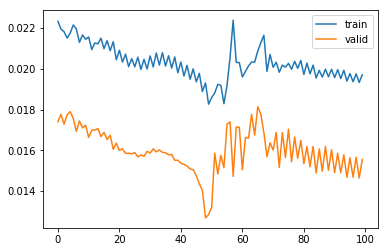

In [ ]:
#Declaration of model
model = Sequential()
#adding LSTM layer
model.add(LSTM(64, input_shape=(24,9),kernel_initializer='truncated_normal',return_sequences=True))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1,activation='linear'))
#Training the model
model.compile(loss='mae', optimizer=Adam(lr=0.00005))
#Plotting the training and validation sets
history = model.fit(train_x, train_y, epochs=100, batch_size=15058, validation_data=(valid_x, valid_y), verbose=1, shuffle=False)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='valid')
pyplot.legend()
pyplot.show()

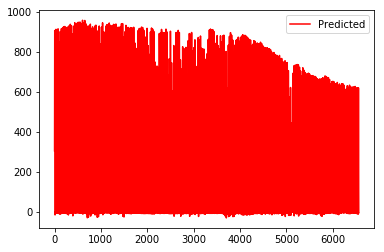

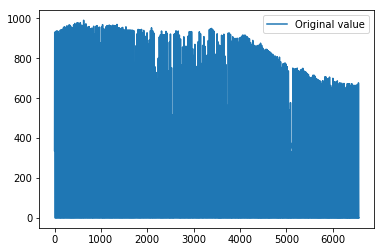

In [ ]:
#Plotting the predicted vs acual graphs
plt.plot(inv_yhat[:],color='red',label='Predicted')
plt.legend()
plt.show()
plt.plot(inv_y[:],label='Original value')
plt.legend()
plt.show()

In [ ]:
#Rescaling the data 
import sklearn.metrics as metrics
yhat = model.predict(test_x)

inv_yhat = scale_y.inverse_transform(yhat)

inv_y = scale_y.inverse_transform(test_y)

#Finding the accuracy with RMSE function
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 42.201
